ANA KOD

1.Başlama
Location: B, Status: Dirty
Action: Suck
Location: A, Status: Clean
Action: NoOp
Location: B, Status: Clean
Action: NoOp
Location: A, Status: Clean
Action: NoOp
Location: B, Status: Clean
Action: NoOp
Location: A, Status: Dirty
Action: Suck
Location: B, Status: Clean
Action: NoOp
Location: A, Status: Clean
Action: NoOp
Location: B, Status: Clean
Action: NoOp
Location: A, Status: Dirty
Action: Suck
Location: B, Status: Dirty
Action: Suck
Location: A, Status: Clean
Action: NoOp
Location: B, Status: Dirty
Action: Suck
Location: A, Status: Dirty
Action: Suck
Location: B, Status: Dirty
Action: Suck
Location: A, Status: Clean
Action: NoOp


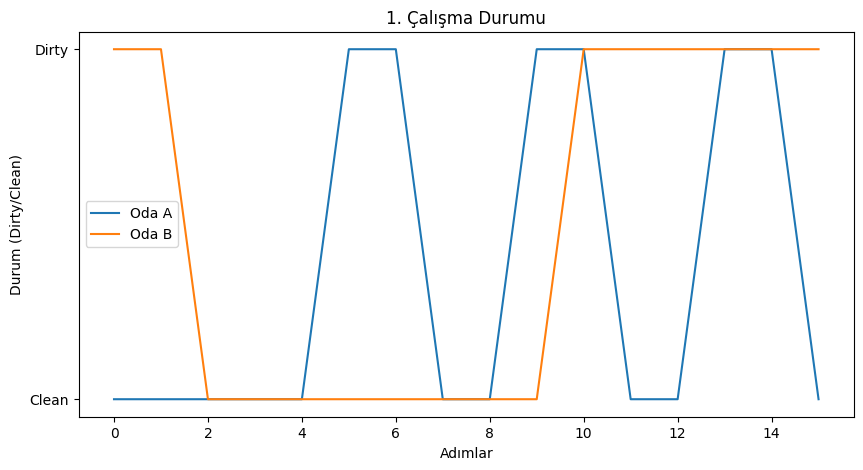

Agent's actions:
Suck in B
Move Left
NoOp
Move Right
NoOp
Move Left
NoOp
Move Right
NoOp
Move Left
Suck in A
Move Right
NoOp
Move Left
NoOp
Move Right
NoOp
Move Left
Suck in A
Move Right
Suck in B
Move Left
NoOp
Move Right
Suck in B
Move Left
Suck in A
Move Right
Suck in B
Move Left
NoOp
Move Right




In [6]:
# ANA KOD 2
# Yapay zeka ile elektrikli süpürge çalışması
# 1.Proje
# 7/11/2023
# Şerafettin Doruk SEZER/sdoruksezer@gmail.com 

# Rastgele sayıları oluşturmak için random kütüphanesini kullandım
# Algı dizisini graf kullanarak göstermek için matplotlib.pyplot kütüphanesini kullandım.
import random
import matplotlib.pyplot as plt

# VacuumAgent klasımızı oluşturduk ve içine algı listemizi oluşturduk.
# Ajanın konumunu ve odaların kirli veya temiz olma durumlarını rastgele olarak seçtik
class VacuumAgent:
    def __init__(self):
        self.actions = []
        self.location = random.choice(['A', 'B'])
        self.status = 'Dirty' if random.random() < 0.6 else 'Clean'

# perceive fonksiyonun ajanın dış dünyayı algılamasını simgeler
    def perceive(self, location, status):
        self.location = location
        self.status = status

# Ajanın süpürme işlemini gerçekleştiren bir fonksiyondur.
# Süpürme işlemi algı listesine eklenir. 
    def vacuum(self):
        self.actions.append(f"Suck in {self.location}")
        return "Suck"

# Ajanın hareket etme işlemini gerçekleştiren bir metottur. 
# Hareket işlemi algı listesine eklenir
    def move(self):
        if self.location == 'A':
            self.actions.append("Move Right")
            self.location = 'B'
            return "Right"
        elif self.location == 'B':
            self.actions.append("Move Left")
            self.location = 'A'
            return "Left"

# Ajanın bir aksiyon seçimini ve uygulamasını gerçekleştiren bir metottur. 
# Ajanın durumuna bağlı olarak süpürme veya hareket işlemleri gerçekleştirilir
    def act(self):
        if self.status == 'Dirty':
            self.vacuum()
            self.move()
            return "Suck"
        else:
            self.actions.append("NoOp")
            self.move()
            return "NoOp"
            

def main():
    # Oda temizlik zamanlarını ve odaların başlangıç durumlarını tanımladık
    room_cleaning_time = {"A": 5, "B": 7}
    room_statuses = {"A": "Clean", "B": "Clean"}   # Oda durumlarını izlemek için bir değişken.
    count = 1

    # Sonsuz bir döngü başlatılır 
    while True:
        agent = VacuumAgent()
        total_situations = (2 * 2 * 2) * 2  # Toplam durum = Haraket * Kirli/Temiz * Oda saysı (2x2x2)
        current_count = 1
        print(f"{count}.Başlama")
        status_changes = {"A": [], "B": []}

        while current_count <= total_situations:
            location = agent.location
            status = room_statuses[location]

            # Durumlar rastgele olarak kirli veya temiz yapılır
            if status == 'Clean' and random.random() < 0.6:
                status = 'Dirty'
            elif status == 'Dirty' and random.random() < 0.6:
                status = 'Clean'

            # status_changes değişkenimize ajanımızın konum bilgisi eklenir
            status_changes["A"].append(status if location == "A" else room_statuses["A"])
            status_changes["B"].append(status if location == "B" else room_statuses["B"])

            # Mevcut konumu ve durumu ekrana yazdırır.
            print(f"Location: {location}, Status: {status}")
            # Ajanın algılaması güncellenir.
            agent.perceive(location, status)
            room_statuses[location] = status  # Odanın yeni durumunu burada güncelliyorum.

            action = agent.act()
            print(f"Action: {action}")

            current_count += 1

        # Grafik çizimi
        plt.figure(figsize=(10, 5))
        # Grafik çizimi için verileri sağlar. 
        # Bu satırlar, her adımda odaların durum değişikliklerini çizmek için kullanıyorum..
        plt.plot(range(total_situations), status_changes["A"], label="Oda A")
        plt.plot(range(total_situations), status_changes["B"], label="Oda B")
        plt.xlabel("Adımlar")
        plt.ylabel("Durum (Dirty/Clean)")
        # Grafik üzerinde legeni (açıklama) görüntüler.
        plt.legend(loc="best")
        plt.title(f"{count}. Çalışma Durumu")
        plt.show()

        print("Agent's actions:")
        for action in agent.actions:
            print(action)
        
        print("\n")
        count += 1
        
        # Kullanıcının programı devam ettirmesi veya çıkması için bir girdi alınır. 
        # 'C' girildiğinde program devam eder, 'E' girildiğinde program sona erer.
        user_input = input("Devam etmek için 'C' tuşuna, çıkmak için 'E' tuşuna basın: ")
        if user_input.lower() in ['e']:
            break
        elif user_input.lower() in ['c']:
            continue
        else:
            print("Girdiğiniz bu " + str(user_input) + " komut yanlış. Sistem kapanıyor...")
            break

if __name__ == "__main__":
    main()
